# Стадии решения задач

- подключение библиотек
- загрузка данных 
- разведочный анализ данных
- предварительная обработка данных
- обучение моделей
- прогнозирование

# Загрузка библиотек

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [59]:
import matplotlib.pyplot as plt

# Загрузка данных

In [60]:
data = pd.read_csv("real_estate_data.csv", low_memory=False)

In [61]:
data.head()

,id,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,furnished,heating_type,price,price_currency
0,1,Konut,Rezidans,12/10/18,1/9/19,2,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,3500.0,TRY
1,2,Konut,Daire,2/13/19,NaN,1,14,0,20 ve üzeri,20 ve üzeri,1+0,43.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,490000.0,TRY
2,3,Konut,Daire,10/9/18,11/8/18,1,30,0,1,Yüksek Giriş,2+1,NaN,Tekirdağ/Çorlu/Reşadiye,NaN,Fancoil,155000.0,TRY
3,4,Konut,Rezidans,9/10/18,10/10/18,1,30,3,20 ve üzeri,20 ve üzeri,6+1,450.0,İstanbul/Beşiktaş/Levent,NaN,Fancoil,32500000.0,TRY
4,5,Konut,Rezidans,12/10/18,1/9/19,1,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,1450000.0,TRY


## Описание данных

1. id
2. type - тип желья
3. sub_type - подгруппа
4. start_date - Начало оформления документов (ММ//ДД//ГГ)
5. end_date - конец оформления дкументов (ММ//ДД//ГГ)
6. listing_type - Стутус недвижимости (Аренда\Продажа)
7. tom - Время на рынке (Формат: ДД)
8. building_age - время постройки 
9. total_floor_count - количество этажей в здании
10. floor_no - Количество этажей по документам
11. room_count - Количество комнат + Гостинная
12. size - Размер недвижемости в квадратных метрах
13. address - Адрес недвижимости
14. furnished - комликтация квартиры
• Eşyasız = Без мебели, 
• Sadece Beyaz Eşya = только белая бытовая техника, 
• Sadece Mutfak = только кухня
16. heating_type типы отопительных систем -
17. price цена за недвижемость -
18. price_curren - Валюта цены недвижемостиcy

## Разведочный анализ данных

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403487 entries, 0 to 403486
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 403487 non-null  int64  
 1   type               403487 non-null  object 
 2   sub_type           403487 non-null  object 
 3   start_date         403487 non-null  object 
 4   end_date           266298 non-null  object 
 5   listing_type       403487 non-null  int64  
 6   tom                403487 non-null  int64  
 7   building_age       376097 non-null  object 
 8   total_floor_count  375466 non-null  object 
 9   floor_no           368191 non-null  object 
 10  room_count         403487 non-null  object 
 11  size               257481 non-null  float64
 12  address            403487 non-null  object 
 13  furnished          0 non-null       float64
 14  heating_type       375517 non-null  object 
 15  price              402772 non-null  float64
 16  pr

## Просмотр пустых значений в нашем датесете

In [63]:
for col in data.columns:
    print('Кол-во пропусков в колонке %s = %d' % (col, data[col].isna().sum()))

Кол-во пропусков в колонке id = 0
Кол-во пропусков в колонке type = 0
Кол-во пропусков в колонке sub_type = 0
Кол-во пропусков в колонке start_date = 0
Кол-во пропусков в колонке end_date = 137189
Кол-во пропусков в колонке listing_type = 0
Кол-во пропусков в колонке tom = 0
Кол-во пропусков в колонке building_age = 27390
Кол-во пропусков в колонке total_floor_count = 28021
Кол-во пропусков в колонке floor_no = 35296
Кол-во пропусков в колонке room_count = 0
Кол-во пропусков в колонке size = 146006
Кол-во пропусков в колонке address = 0
Кол-во пропусков в колонке furnished = 403487
Кол-во пропусков в колонке heating_type = 27970
Кол-во пропусков в колонке price = 715
Кол-во пропусков в колонке price_currency = 715


In [64]:
for col in data.columns:
    print(f'Кол-во пропусков в колонке {col} ={data[col].isna().sum()/data.shape[0] * 100:.2f} % ')

Кол-во пропусков в колонке id =0.00 % 
Кол-во пропусков в колонке type =0.00 % 
Кол-во пропусков в колонке sub_type =0.00 % 
Кол-во пропусков в колонке start_date =0.00 % 
Кол-во пропусков в колонке end_date =34.00 % 
Кол-во пропусков в колонке listing_type =0.00 % 
Кол-во пропусков в колонке tom =0.00 % 
Кол-во пропусков в колонке building_age =6.79 % 
Кол-во пропусков в колонке total_floor_count =6.94 % 
Кол-во пропусков в колонке floor_no =8.75 % 
Кол-во пропусков в колонке room_count =0.00 % 
Кол-во пропусков в колонке size =36.19 % 
Кол-во пропусков в колонке address =0.00 % 
Кол-во пропусков в колонке furnished =100.00 % 
Кол-во пропусков в колонке heating_type =6.93 % 
Кол-во пропусков в колонке price =0.18 % 
Кол-во пропусков в колонке price_currency =0.18 % 


In [65]:
data.describe()

,id,listing_type,tom,size,furnished,price
count,403487.00000,403487.000000,403487.000000,257481.000000,0.0,4.027720e+05
mean,201744.00000,1.294235,57.022739,279.349094,NaN,3.546417e+05
std,116476.80837,0.467733,44.358933,9429.195331,NaN,4.809503e+06
min,1.00000,1.000000,0.000000,1.000000,NaN,-2.500000e+02
25%,100872.50000,1.000000,29.000000,85.000000,NaN,2.500000e+03
50%,201744.00000,1.000000,40.000000,110.000000,NaN,1.990000e+05
75%,302615.50000,2.000000,90.000000,140.000000,NaN,3.420000e+05
max,403487.00000,3.000000,180.000000,948235.000000,NaN,2.000000e+09


# предварительная обработка данных

Сколько у нас есть типов жилья

In [66]:
data['type'].value_counts()

type
Konut    403487
Name: count, dtype: int64

### Удаляем столбец type

In [67]:
data = data.drop('type', axis=1)

In [68]:
Listing_counts = data['listing_type'].value_counts()
Listing_counts

listing_type
1    287009
2    114236
3      2242
Name: count, dtype: int64

In [69]:
# Находим самое частое значение (моду)
mode_value = data[data['listing_type'] != 3]['listing_type'].mode()[0]
print(f"Самое частое значение (мода): {mode_value}")

# Заменяем все значения 3 на моду
data['listing_type'] = data['listing_type'].replace(3, mode_value)

Самое частое значение (мода): 1


In [70]:
Listing_counts = data['listing_type'].value_counts()
Listing_counts

listing_type
1    289251
2    114236
Name: count, dtype: int64

## Заполнение средними значениями размеры квартир

In [71]:
# Вычисляем среднее значение
mean_size = data['size'].mean()
print(f"Среднее значение: {mean_size}")

# Заменяем пропуски (NaN) на среднее значение
data['size'] = data['size'].fillna(mean_size)

Среднее значение: 279.3490937195366


count    403487.000000
mean        279.349094
std        7532.378716
min           1.000000
25%         100.000000
50%         150.000000
75%         279.349094
max      948235.000000
Name: size, dtype: float64


<Axes: >

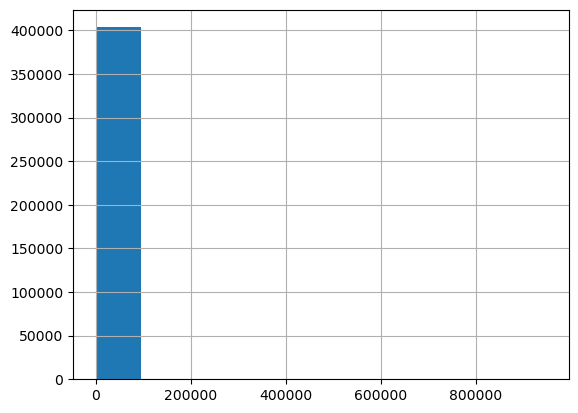

In [72]:
print(data['size'].describe())
data['size'].hist()

## Размеры квартир

In [73]:
small_values = data[data['size'] < 20]['size']
value_counts_small = small_values.value_counts().sort_index()
print(value_counts_small)
print("Всего: ",sum(value_counts_small))

size
1.0     291
2.0      27
3.0      23
4.0      16
5.0      17
6.0       4
7.0       1
8.0       7
9.0       3
10.0     45
11.0      5
12.0     11
13.0      4
14.0      3
15.0     14
16.0      1
17.0      7
18.0      8
19.0      6
Name: count, dtype: int64
Всего:  493


In [74]:
data = data[data['size'] > 20]

In [75]:
print(f"Размер датасета после удаления: {len(data)}")
print("Распределение оставшихся значений:")
print(data['size'].value_counts().sort_index())

Размер датасета после удаления: 402945
Распределение оставшихся значений:
size
21.0        19
22.0        11
23.0        24
24.0        13
25.0        98
            ..
870752.0     2
902221.0     3
909039.0     1
930259.0     1
948235.0     1
Name: count, Length: 924, dtype: int64


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 402945 entries, 0 to 403486
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 402945 non-null  int64  
 1   sub_type           402945 non-null  object 
 2   start_date         402945 non-null  object 
 3   end_date           265988 non-null  object 
 4   listing_type       402945 non-null  int64  
 5   tom                402945 non-null  int64  
 6   building_age       375619 non-null  object 
 7   total_floor_count  374975 non-null  object 
 8   floor_no           367745 non-null  object 
 9   room_count         402945 non-null  object 
 10  size               402945 non-null  float64
 11  address            402945 non-null  object 
 12  furnished          0 non-null       float64
 13  heating_type       375033 non-null  object 
 14  price              402230 non-null  float64
 15  price_currency     402230 non-null  object 
dtypes: floa

In [77]:
data

,id,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,furnished,heating_type,price,price_currency
0,1,Rezidans,12/10/18,1/9/19,2,30,0,20 ve üzeri,2,2+1,90.000000,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,3500.0,TRY
1,2,Daire,2/13/19,NaN,1,14,0,20 ve üzeri,20 ve üzeri,1+0,43.000000,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,490000.0,TRY
2,3,Daire,10/9/18,11/8/18,1,30,0,1,Yüksek Giriş,2+1,279.349094,Tekirdağ/Çorlu/Reşadiye,NaN,Fancoil,155000.0,TRY
3,4,Rezidans,9/10/18,10/10/18,1,30,3,20 ve üzeri,20 ve üzeri,6+1,450.000000,İstanbul/Beşiktaş/Levent,NaN,Fancoil,32500000.0,TRY
4,5,Rezidans,12/10/18,1/9/19,1,30,0,20 ve üzeri,2,2+1,90.000000,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,1450000.0,TRY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403481,403482,Daire,1/12/19,NaN,1,46,NaN,NaN,NaN,+,279.349094,İzmir/Menemen/Zeytinlik,NaN,NaN,NaN,NaN
403482,403483,Daire,9/18/18,NaN,2,162,NaN,NaN,NaN,+,279.349094,İstanbul/Sultanbeyli/Adil,NaN,NaN,1500.0,TRY
403483,403484,Daire,10/11/18,NaN,1,139,NaN,NaN,NaN,2+1,279.349094,Sakarya/Adapazarı/Cumhuriyet,NaN,NaN,120000.0,TRY
403484,403485,Daire,11/22/18,NaN,1,97,NaN,NaN,NaN,1+1,279.349094,Antalya/Alanya/Saray,NaN,NaN,48000.0,EUR


### Время постройки 

ve üzeri - примерный возраст
arası - примерное время постройки

In [78]:
data["building_age"].value_counts()

building_age
0              140034
6-10 arası      50423
11-15 arası     32264
16-20 arası     31293
1               20291
4               19003
21-25 arası     18415
2               17454
3               15635
5               13564
26-30 arası     10577
31-35 arası      4261
36-40 arası      1347
40 ve üzeri      1058
Name: count, dtype: int64

In [79]:
#Заполнить средними значениями

In [80]:
# Удаляем строки с текстовыми описаниями
original_count = len(data)
data = data[~data['building_age'].astype(str).str.contains('ve üzeri|arası|arasi', case=False, na=False)]

# Проверяем результат
print(f"Удалено записей: {original_count - len(data)}")
print(f"Осталось записей: {len(data)}")
print("\nУникальные значения в building_age после очистки:")
print(data['building_age'].value_counts().sort_index())

Удалено записей: 149638
Осталось записей: 253307

Уникальные значения в building_age после очистки:
building_age
0    140034
1     20291
2     17454
3     15635
4     19003
5     13564
Name: count, dtype: int64


In [81]:
data["building_age"].value_counts()

building_age
0    140034
1     20291
4     19003
2     17454
3     15635
5     13564
Name: count, dtype: int64

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 253307 entries, 0 to 403486
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 253307 non-null  int64  
 1   sub_type           253307 non-null  object 
 2   start_date         253307 non-null  object 
 3   end_date           165895 non-null  object 
 4   listing_type       253307 non-null  int64  
 5   tom                253307 non-null  int64  
 6   building_age       225981 non-null  object 
 7   total_floor_count  228236 non-null  object 
 8   floor_no           225292 non-null  object 
 9   room_count         253307 non-null  object 
 10  size               253307 non-null  float64
 11  address            253307 non-null  object 
 12  furnished          0 non-null       float64
 13  heating_type       228047 non-null  object 
 14  price              252651 non-null  float64
 15  price_currency     252651 non-null  object 
dtypes: floa

In [83]:
data.head(5)

,id,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,furnished,heating_type,price,price_currency
0,1,Rezidans,12/10/18,1/9/19,2,30,0,20 ve üzeri,2,2+1,90.000000,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,3500.0,TRY
1,2,Daire,2/13/19,NaN,1,14,0,20 ve üzeri,20 ve üzeri,1+0,43.000000,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,490000.0,TRY
2,3,Daire,10/9/18,11/8/18,1,30,0,1,Yüksek Giriş,2+1,279.349094,Tekirdağ/Çorlu/Reşadiye,NaN,Fancoil,155000.0,TRY
3,4,Rezidans,9/10/18,10/10/18,1,30,3,20 ve üzeri,20 ve üzeri,6+1,450.000000,İstanbul/Beşiktaş/Levent,NaN,Fancoil,32500000.0,TRY
4,5,Rezidans,12/10/18,1/9/19,1,30,0,20 ve üzeri,2,2+1,90.000000,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,1450000.0,TRY


#### Количество квартир без конечных документов+

In [84]:
nan_count = data['end_date'].isna().sum()
print(f"Количество записей без конечной даты (NaN): {nan_count}")

Количество записей без конечной даты (NaN): 87412


#### Количество этаже в доме

In [85]:
floor_no_counts = data['floor_no'].value_counts()
floor_no_counts

floor_no
2               43197
3               31566
1               29339
4               19527
Yüksek Giriş    15458
5               12071
Bahçe katı      11814
Müstakil        10713
6                5853
Giriş Katı       5670
7                4703
8                3934
9                3255
Kot 2            3140
Kot 1            2923
10               2653
Kot 3            2330
Zemin Kat        2124
Çatı Katı        2116
11               2107
12               1749
Komple           1373
Kot 4            1287
13               1287
20 ve üzeri      1206
14                956
15                700
En Üst Kat        576
16                444
Bodrum Kat        343
17                293
18                243
Teras Kat         183
19                149
Asma Kat           10
Name: count, dtype: int64

#### Типы отопления

In [86]:
data["heating_type"].value_counts()

heating_type
Kombi (Doğalgaz)                   124034
Klima                               37945
Merkezi Sistem (Isı Payı Ölçer)     25476
Merkezi Sistem                      13359
Kalorifer (Doğalgaz)                 6670
Yerden Isıtma                        5870
Kat Kaloriferi                       3914
Yok                                  2937
Soba (Kömür)                         2281
Kombi (Elektrikli)                   2090
Soba (Doğalgaz)                       928
Kalorifer (Kömür)                     812
Güneş Enerjisi                        699
Jeotermal                             422
Fancoil                               409
Kalorifer (Akaryakıt)                 201
Name: count, dtype: int64

In [87]:
heating_counts = data["heating_type"].value_counts()
heating_dict = {heating_type: idx + 1 for idx, heating_type in enumerate(heating_counts.index)}
print("Словарь сопоставления:")
for heating_type, heating_id in heating_dict.items():
    print(f"{heating_id}: {heating_type}")

data['id_heating_type'] = data['heating_type'].map(heating_dict)

print(data[['heating_type', 'id_heating_type']].head())

Словарь сопоставления:
1: Kombi (Doğalgaz)
2: Klima
3: Merkezi Sistem (Isı Payı Ölçer)
4: Merkezi Sistem
5: Kalorifer (Doğalgaz)
6: Yerden Isıtma
7: Kat Kaloriferi
8: Yok
9: Soba (Kömür)
10: Kombi (Elektrikli)
11: Soba (Doğalgaz)
12: Kalorifer (Kömür)
13: Güneş Enerjisi
14: Jeotermal
15: Fancoil
16: Kalorifer (Akaryakıt)
  heating_type  id_heating_type
0      Fancoil             15.0
1      Fancoil             15.0
2      Fancoil             15.0
3      Fancoil             15.0
4      Fancoil             15.0


In [88]:
data.head(5)

,id,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,furnished,heating_type,price,price_currency,id_heating_type
0,1,Rezidans,12/10/18,1/9/19,2,30,0,20 ve üzeri,2,2+1,90.000000,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,3500.0,TRY,15.0
1,2,Daire,2/13/19,NaN,1,14,0,20 ve üzeri,20 ve üzeri,1+0,43.000000,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,490000.0,TRY,15.0
2,3,Daire,10/9/18,11/8/18,1,30,0,1,Yüksek Giriş,2+1,279.349094,Tekirdağ/Çorlu/Reşadiye,NaN,Fancoil,155000.0,TRY,15.0
3,4,Rezidans,9/10/18,10/10/18,1,30,3,20 ve üzeri,20 ve üzeri,6+1,450.000000,İstanbul/Beşiktaş/Levent,NaN,Fancoil,32500000.0,TRY,15.0
4,5,Rezidans,12/10/18,1/9/19,1,30,0,20 ve üzeri,2,2+1,90.000000,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,1450000.0,TRY,15.0


In [89]:
data = data.drop('heating_type', axis=1)

In [90]:
data.head()

,id,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,furnished,price,price_currency,id_heating_type
0,1,Rezidans,12/10/18,1/9/19,2,30,0,20 ve üzeri,2,2+1,90.000000,İstanbul/Kartal/Kordonboyu,NaN,3500.0,TRY,15.0
1,2,Daire,2/13/19,NaN,1,14,0,20 ve üzeri,20 ve üzeri,1+0,43.000000,İstanbul/Kartal/Kordonboyu,NaN,490000.0,TRY,15.0
2,3,Daire,10/9/18,11/8/18,1,30,0,1,Yüksek Giriş,2+1,279.349094,Tekirdağ/Çorlu/Reşadiye,NaN,155000.0,TRY,15.0
3,4,Rezidans,9/10/18,10/10/18,1,30,3,20 ve üzeri,20 ve üzeri,6+1,450.000000,İstanbul/Beşiktaş/Levent,NaN,32500000.0,TRY,15.0
4,5,Rezidans,12/10/18,1/9/19,1,30,0,20 ve üzeri,2,2+1,90.000000,İstanbul/Kartal/Kordonboyu,NaN,1450000.0,TRY,15.0


#### Компликтация квартир

In [91]:
data["furnished"].value_counts()

Series([], Name: count, dtype: int64)

In [92]:
data = data.drop('furnished', axis=1)

In [93]:
data.head()

,id,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,price,price_currency,id_heating_type
0,1,Rezidans,12/10/18,1/9/19,2,30,0,20 ve üzeri,2,2+1,90.000000,İstanbul/Kartal/Kordonboyu,3500.0,TRY,15.0
1,2,Daire,2/13/19,NaN,1,14,0,20 ve üzeri,20 ve üzeri,1+0,43.000000,İstanbul/Kartal/Kordonboyu,490000.0,TRY,15.0
2,3,Daire,10/9/18,11/8/18,1,30,0,1,Yüksek Giriş,2+1,279.349094,Tekirdağ/Çorlu/Reşadiye,155000.0,TRY,15.0
3,4,Rezidans,9/10/18,10/10/18,1,30,3,20 ve üzeri,20 ve üzeri,6+1,450.000000,İstanbul/Beşiktaş/Levent,32500000.0,TRY,15.0
4,5,Rezidans,12/10/18,1/9/19,1,30,0,20 ve üzeri,2,2+1,90.000000,İstanbul/Kartal/Kordonboyu,1450000.0,TRY,15.0


#### Количество комнат

In [94]:
data["room_count"].value_counts()

room_count
2+1     93073
3+1     86438
1+1     30824
4+1     25166
5+1      4640
4+2      2773
1+0      1979
3+2      1813
+        1660
5+2      1492
6+1      1084
6+2       641
2+2       587
7+1       248
7+2       181
10+0      151
4+3        87
8+1        87
8+2        80
6+3        64
5+3        64
9+2        34
7+3        32
9+1        24
8+4        19
9+5        16
8+3        14
9+3        13
9+4         6
10+1        6
10+2        6
10+3        3
11+3        1
15+5        1
Name: count, dtype: int64

In [95]:
original_count = len(data)
data = data[~data['room_count'].isin(['+', '0+0'])]

# Проверяем результат
print(f"Удалено записей: {original_count - len(data)}")
print(f"Осталось записей: {len(data)}")
print("\nУникальные значения в room_count после очистки:")
print(data['room_count'].value_counts().sort_index())

Удалено записей: 1660
Осталось записей: 251647

Уникальные значения в room_count после очистки:
room_count
1+0      1979
1+1     30824
10+0      151
10+1        6
10+2        6
10+3        3
11+3        1
15+5        1
2+1     93073
2+2       587
3+1     86438
3+2      1813
4+1     25166
4+2      2773
4+3        87
5+1      4640
5+2      1492
5+3        64
6+1      1084
6+2       641
6+3        64
7+1       248
7+2       181
7+3        32
8+1        87
8+2        80
8+3        14
8+4        19
9+1        24
9+2        34
9+3        13
9+4         6
9+5        16
Name: count, dtype: int64


In [96]:
data.head()

,id,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,price,price_currency,id_heating_type
0,1,Rezidans,12/10/18,1/9/19,2,30,0,20 ve üzeri,2,2+1,90.000000,İstanbul/Kartal/Kordonboyu,3500.0,TRY,15.0
1,2,Daire,2/13/19,NaN,1,14,0,20 ve üzeri,20 ve üzeri,1+0,43.000000,İstanbul/Kartal/Kordonboyu,490000.0,TRY,15.0
2,3,Daire,10/9/18,11/8/18,1,30,0,1,Yüksek Giriş,2+1,279.349094,Tekirdağ/Çorlu/Reşadiye,155000.0,TRY,15.0
3,4,Rezidans,9/10/18,10/10/18,1,30,3,20 ve üzeri,20 ve üzeri,6+1,450.000000,İstanbul/Beşiktaş/Levent,32500000.0,TRY,15.0
4,5,Rezidans,12/10/18,1/9/19,1,30,0,20 ve üzeri,2,2+1,90.000000,İstanbul/Kartal/Kordonboyu,1450000.0,TRY,15.0


#### Работа с адресом

In [97]:
split_result = data['address'].str.split('/', expand=True)

if split_result.shape[1] >= 3:
    data['city'] = split_result[0]
    data['county'] = split_result[1]
    data['district'] = split_result[2]
else:
    print("Проблема: не все адреса содержат 3 компонента!")
    data['city'] = split_result[0]
    data['county'] = split_result[1] if split_result.shape[1] >= 2 else None
    data['district'] = split_result[2] if split_result.shape[1] >= 3 else None

Удаляем столбец "address"

In [98]:
data = data.drop('address', axis=1)

In [99]:
data.head()

,id,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,price,price_currency,id_heating_type,city,county,district
0,1,Rezidans,12/10/18,1/9/19,2,30,0,20 ve üzeri,2,2+1,90.000000,3500.0,TRY,15.0,İstanbul,Kartal,Kordonboyu
1,2,Daire,2/13/19,NaN,1,14,0,20 ve üzeri,20 ve üzeri,1+0,43.000000,490000.0,TRY,15.0,İstanbul,Kartal,Kordonboyu
2,3,Daire,10/9/18,11/8/18,1,30,0,1,Yüksek Giriş,2+1,279.349094,155000.0,TRY,15.0,Tekirdağ,Çorlu,Reşadiye
3,4,Rezidans,9/10/18,10/10/18,1,30,3,20 ve üzeri,20 ve üzeri,6+1,450.000000,32500000.0,TRY,15.0,İstanbul,Beşiktaş,Levent
4,5,Rezidans,12/10/18,1/9/19,1,30,0,20 ve üzeri,2,2+1,90.000000,1450000.0,TRY,15.0,İstanbul,Kartal,Kordonboyu


In [100]:
data['city'].value_counts()

city
İstanbul    71614
Aydın       23234
Ankara      17667
İzmir       16702
Antalya     13694
            ...  
Şırnak          6
Bayburt         5
Muş             5
Iğdır           5
Tunceli         4
Name: count, Length: 82, dtype: int64

In [101]:
data['county'].value_counts()

county
Merkez        16378
Esenyurt       9995
Didim          9953
Kuşadası       9408
Beylikdüzü     8314
              ...  
Güdül             1
Fındıklı          1
Kozluk            1
Kağızman          1
Aydıncık          1
Name: count, Length: 474, dtype: int64

In [102]:
data['district'].value_counts()

district
Cumhuriyet                      8147
Akçay                           4021
Efeler                          2921
Yeni                            2553
Merkez                          2326
                                ... 
Mehmet Ali Akman                   1
Ocak Köyü                          1
Pirömer                            1
Kemerhisar Bld. (Cumhuriyet)       1
Gökçen                             1
Name: count, Length: 4066, dtype: int64

### id City

In [103]:
city_counts = data["city"].value_counts()
city_dict = {city: idx + 1 for idx, city in enumerate(city_counts.index)}
print("Словарь сопоставления городов:")
for city, city_id in city_dict.items():
    print(f"{city_id}: {city}")

data['id_city'] = data['city'].map(city_dict)

print(data[['city', 'id_city']].head())

Словарь сопоставления городов:
1: İstanbul
2: Aydın
3: Ankara
4: İzmir
5: Antalya
6: Balıkesir
7: Adana
8: Mersin
9: Kocaeli
10: Bursa
11: Muğla
12: Samsun
13: Eskişehir
14: Sakarya
15: Kayseri
16: Tekirdağ
17: Manisa
18: Denizli
19: Çanakkale
20: Konya
21: Trabzon
22: Gaziantep
23: Afyonkarahisar
24: Malatya
25: Yalova
26: Düzce
27: Osmaniye
28: Aksaray
29: Edirne
30: Ordu
31: Kahramanmaraş
32: Adıyaman
33: Erzurum
34: Şanlıurfa
35: Çorum
36: Kastamonu
37: Kırklareli
38: Isparta
39: KKTC
40: Burdur
41: Bolu
42: Kütahya
43: Sivas
44: Kırıkkale
45: Niğde
46: Elazığ
47: Yozgat
48: Amasya
49: Giresun
50: Tokat
51: Uşak
52: Karaman
53: Nevşehir
54: Bingöl
55: Bilecik
56: Rize
57: Sinop
58: Diyarbakır
59: Van
60: Hatay
61: Zonguldak
62: Bartın
63: Batman
64: Kırşehir
65: Siirt
66: Mardin
67: Erzincan
68: Kilis
69: Ağrı
70: Karabük
71: Artvin
72: Gümüşhane
73: Çankırı
74: Kars
75: Bitlis
76: Ardahan
77: Hakkari
78: Şırnak
79: Bayburt
80: Muş
81: Iğdır
82: Tunceli
       city  id_city
0  İsta

####  id_county

In [104]:
county_counts = data["county"].value_counts()
county_dict = {county: idx + 1 for idx, county in enumerate(county_counts.index)}
print("Словарь сопоставления районов:")
for county, county_id in county_dict.items():
    print(f"{county_id}: {county}")

data['id_county'] = data['county'].map(county_dict)

print(data[['county', 'id_county']].head())

Словарь сопоставления районов:
1: Merkez
2: Esenyurt
3: Didim
4: Kuşadası
5: Beylikdüzü
6: Edremit
7: Keçiören
8: Sancaktepe
9: Kepez
10: Atakum
11: Başakşehir
12: Kadıköy
13: Bahçelievler
14: Seyhan
15: Çukurova
16: Etimesgut
17: Muratpaşa
18: Tepebaşı
19: Mezitli
20: Pendik
21: Maltepe
22: Yenişehir
23: Karşıyaka
24: Bodrum
25: Sultangazi
26: Avcılar
27: Karasu
28: Buca
29: Ümraniye
30: Kartal
31: Yenimahalle
32: Küçükçekmece
33: Nilüfer
34: Çankaya
35: Odunpazarı
36: Melikgazi
37: Konyaaltı
38: Çekmeköy
39: Osmangazi
40: Efeler
41: Yunusemre
42: Kağıthane
43: Şahinbey
44: Manavgat
45: Ortahisar
46: Merkezefendi
47: Tuzla
48: Alanya
49: Altındağ
50: Selçuklu
51: Gebze
52: Çorlu
53: Bağcılar
54: Eyüpsultan
55: Mamak
56: Pamukkale
57: İzmit
58: Söke
59: Talas
60: Torbalı
61: Darıca
62: Çerkezköy
63: Ataşehir
64: Kocasinan
65: Çeşme
66: İlkadım
67: Sarıçam
68: Bandırma
69: Çiğli
70: Serdivan
71: Büyükçekmece
72: Fethiye
73: Sarıyer
74: Sultanbeyli
75: Bakırköy
76: Üsküdar
77: Başiskele


#### id_district

In [105]:
district_counts = data["district"].value_counts()
district_dict = {district: idx + 1 for idx, district in enumerate(district_counts.index)}
print("Словарь сопоставления округов/районов:")
for district, district_id in district_dict.items():
    print(f"{district_id}: {district}")

data['id_district'] = data['district'].map(district_dict)

print(data[['district', 'id_district']].head())

Словарь сопоставления округов/районов:
1: Cumhuriyet
2: Akçay
3: Efeler
4: Yeni
5: Merkez
6: Bahçelievler
7: Atatürk
8: Fatih
9: Mevlana
10: Yalı
11: Yenimahalle
12: Kayabaşı
13: Hisar
14: Davutlar
15: Altınkum
16: İnönü
17: Zafer
18: Hürriyet
19: Adnan Kahveci
20: Gürselpaşa
21: Yüzüncüyıl
22: İkiçeşmelik
23: Güzelyurt
24: Akdeniz
25: İstasyon
26: Fevzi Çakmak
27: Etlik
28: Yunus Emre
29: Çamlık
30: Çiftlikköy
31: Emek
32: Akbük
33: Atakent
34: Mimar Sinan
35: Kadınlar Denizi
36: Kavaklı
37: Pınar
38: Değirmendere
39: İstiklal
40: Ege
41: İsmetpaşa
42: Osmangazi
43: Mehmet Akif Ersoy
44: Yakuplu
45: Varsak Karşıyaka
46: Barbaros
47: Beylikdüzü OSB
48: Aziziye
49: Esentepe
50: Yenidoğan
51: Güzeloba
52: Bağlıca
53: Sarılar
54: Körfez
55: Suadiye
56: Hurma
57: Dumlupınar
58: Yenikent
59: Şemikler
60: Muradiye
61: Mustafa Kemal Paşa
62: Abdurrahmangazi
63: Yenişehir
64: Ilıca
65: Cihangir
66: Yenibosna Merkez
67: Şirinevler
68: Siyavuşpaşa
69: Şirintepe
70: Karaova
71: Türkmen
72: Başakş

In [106]:
data = data.drop('city', axis=1)
data = data.drop('county', axis=1)
data = data.drop('district', axis=1)

In [107]:
data.head()

,id,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,price,price_currency,id_heating_type,id_city,id_county,id_district
0,1,Rezidans,12/10/18,1/9/19,2,30,0,20 ve üzeri,2,2+1,90.000000,3500.0,TRY,15.0,1,30.0,232.0
1,2,Daire,2/13/19,NaN,1,14,0,20 ve üzeri,20 ve üzeri,1+0,43.000000,490000.0,TRY,15.0,1,30.0,232.0
2,3,Daire,10/9/18,11/8/18,1,30,0,1,Yüksek Giriş,2+1,279.349094,155000.0,TRY,15.0,16,52.0,257.0
3,4,Rezidans,9/10/18,10/10/18,1,30,3,20 ve üzeri,20 ve üzeri,6+1,450.000000,32500000.0,TRY,15.0,1,91.0,598.0
4,5,Rezidans,12/10/18,1/9/19,1,30,0,20 ve üzeri,2,2+1,90.000000,1450000.0,TRY,15.0,1,30.0,232.0


#### Валюта

In [108]:
currency_counts = data["price_currency"].value_counts()
currency_dict = {currency: idx + 1 for idx, currency in enumerate(currency_counts.index)}
print("Словарь сопоставления валют:")
for currency, currency_id in currency_dict.items():
    print(f"{currency_id}: {currency}")

data['id_price_currency'] = data['price_currency'].map(currency_dict)

print(data[['price_currency', 'id_price_currency']].head())

Словарь сопоставления валют:
1: TRY
2: EUR
3: GBP
4: USD
  price_currency  id_price_currency
0            TRY                1.0
1            TRY                1.0
2            TRY                1.0
3            TRY                1.0
4            TRY                1.0


In [109]:
data = data.drop('price_currency', axis=1)

In [110]:
data.head()

,id,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,price,id_heating_type,id_city,id_county,id_district,id_price_currency
0,1,Rezidans,12/10/18,1/9/19,2,30,0,20 ve üzeri,2,2+1,90.000000,3500.0,15.0,1,30.0,232.0,1.0
1,2,Daire,2/13/19,NaN,1,14,0,20 ve üzeri,20 ve üzeri,1+0,43.000000,490000.0,15.0,1,30.0,232.0,1.0
2,3,Daire,10/9/18,11/8/18,1,30,0,1,Yüksek Giriş,2+1,279.349094,155000.0,15.0,16,52.0,257.0,1.0
3,4,Rezidans,9/10/18,10/10/18,1,30,3,20 ve üzeri,20 ve üzeri,6+1,450.000000,32500000.0,15.0,1,91.0,598.0,1.0
4,5,Rezidans,12/10/18,1/9/19,1,30,0,20 ve üzeri,2,2+1,90.000000,1450000.0,15.0,1,30.0,232.0,1.0


In [111]:
data.to_csv('kv.csv', index=False, encoding='utf-8')

### Графики 

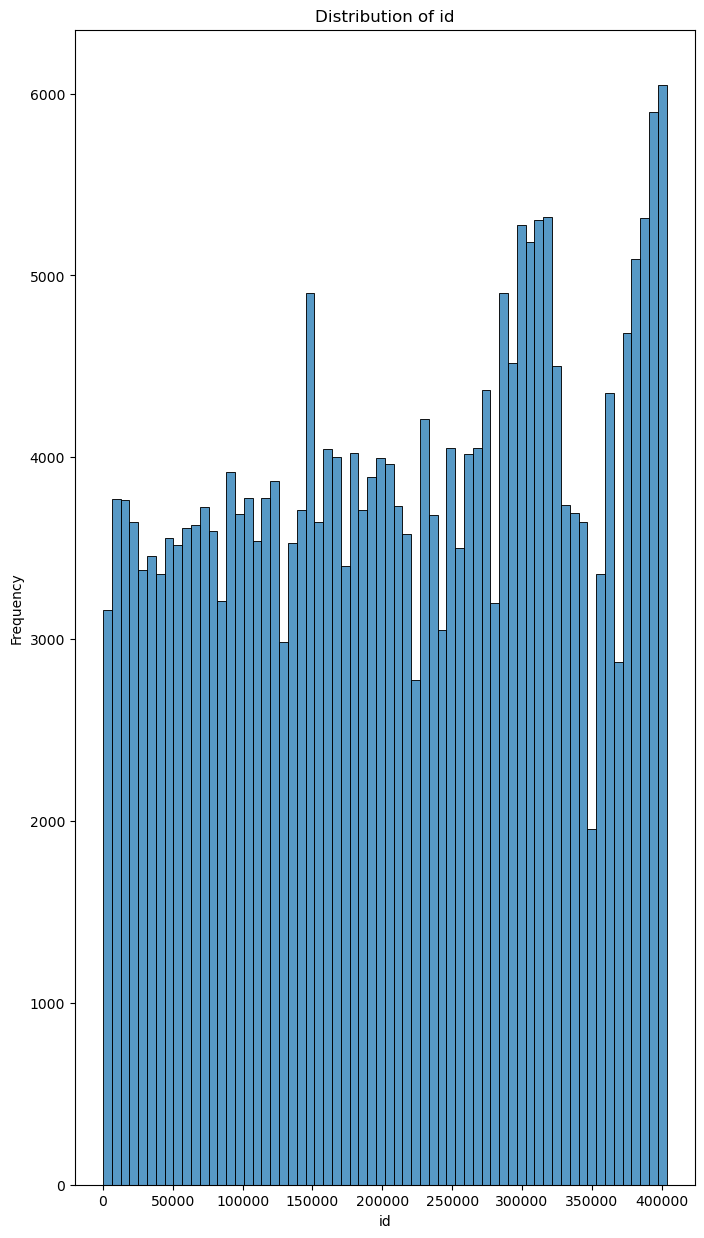

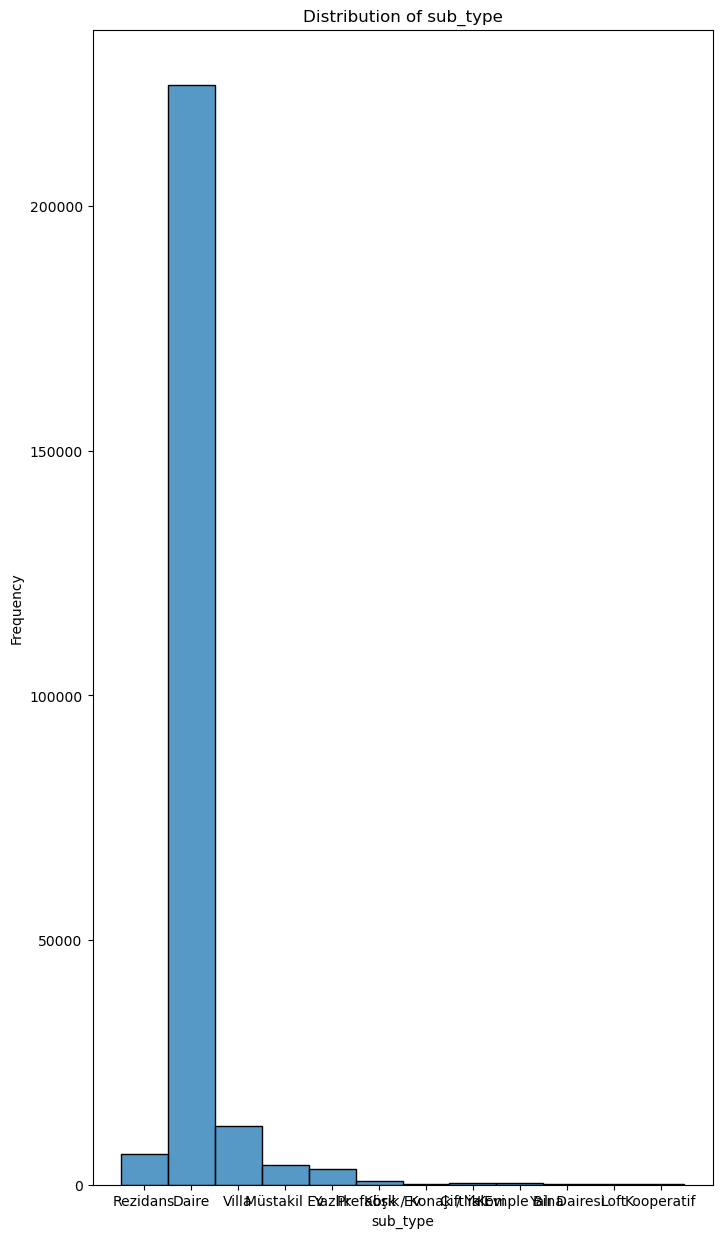

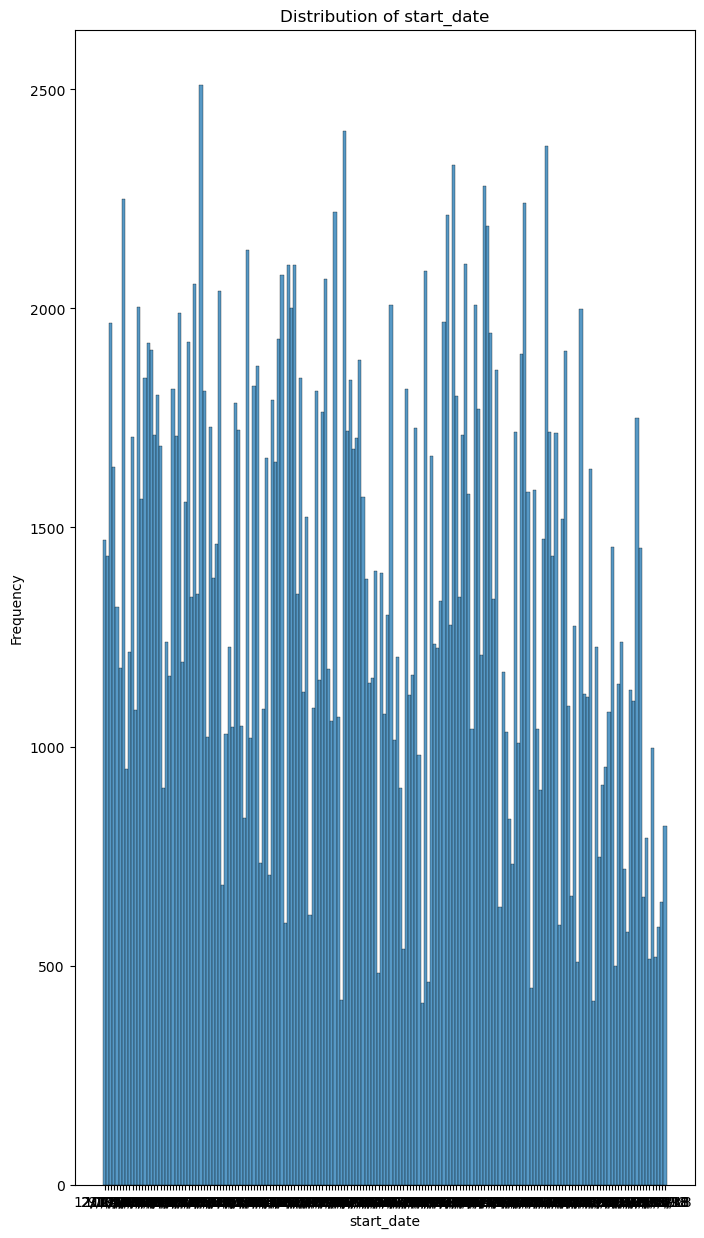

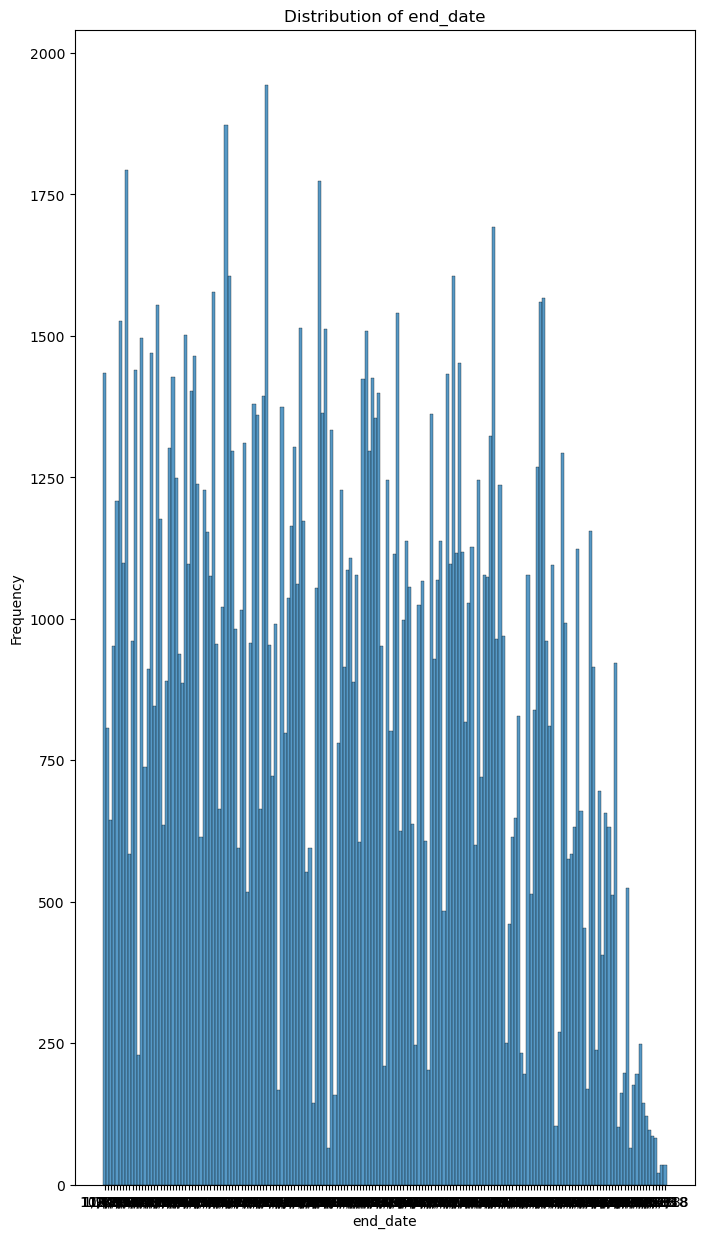

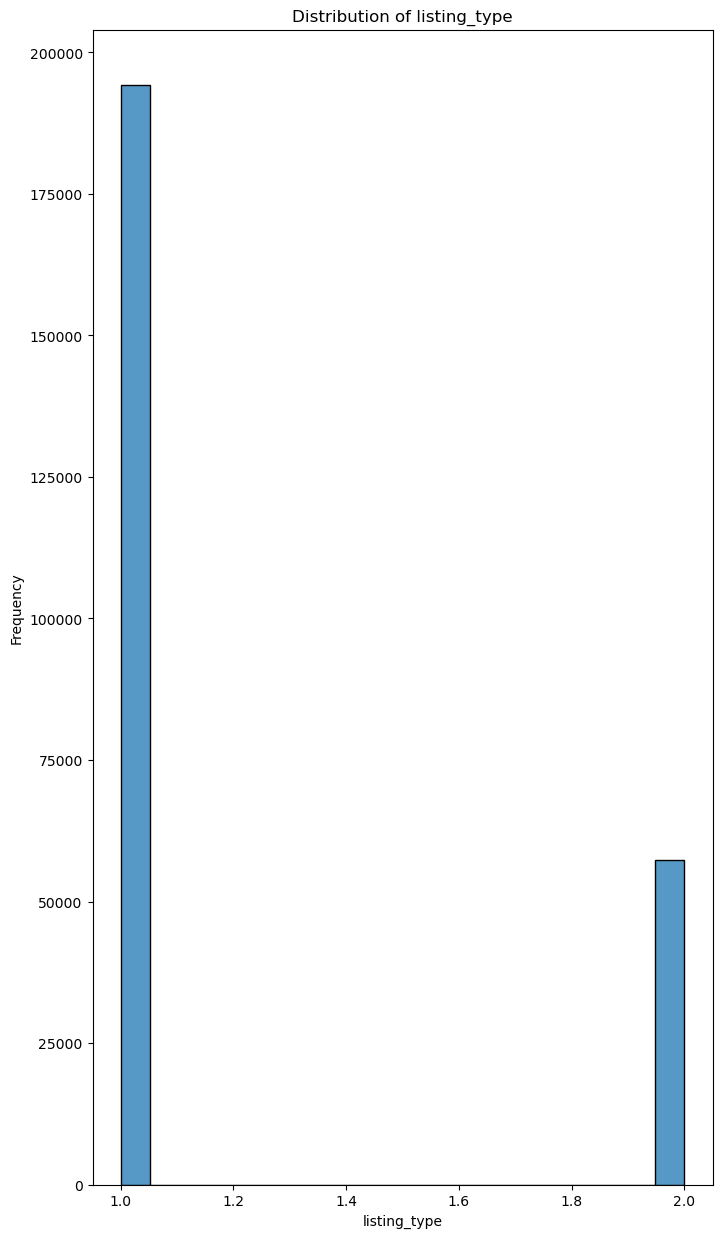

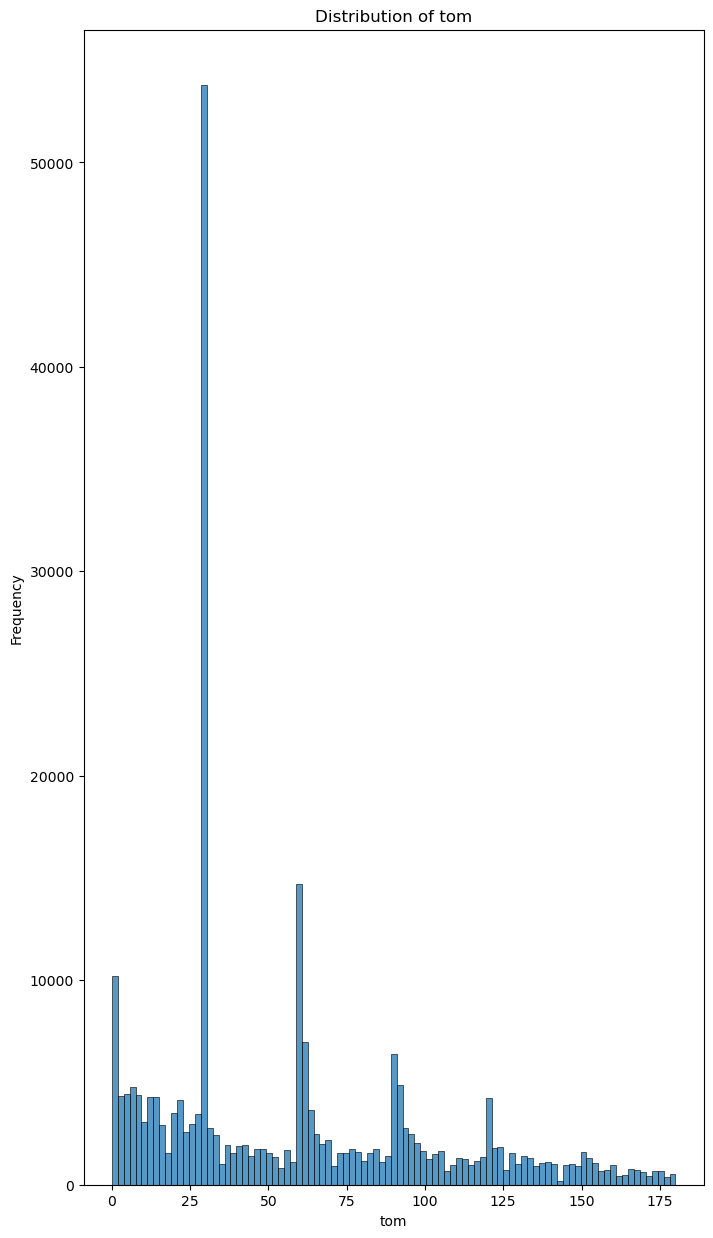

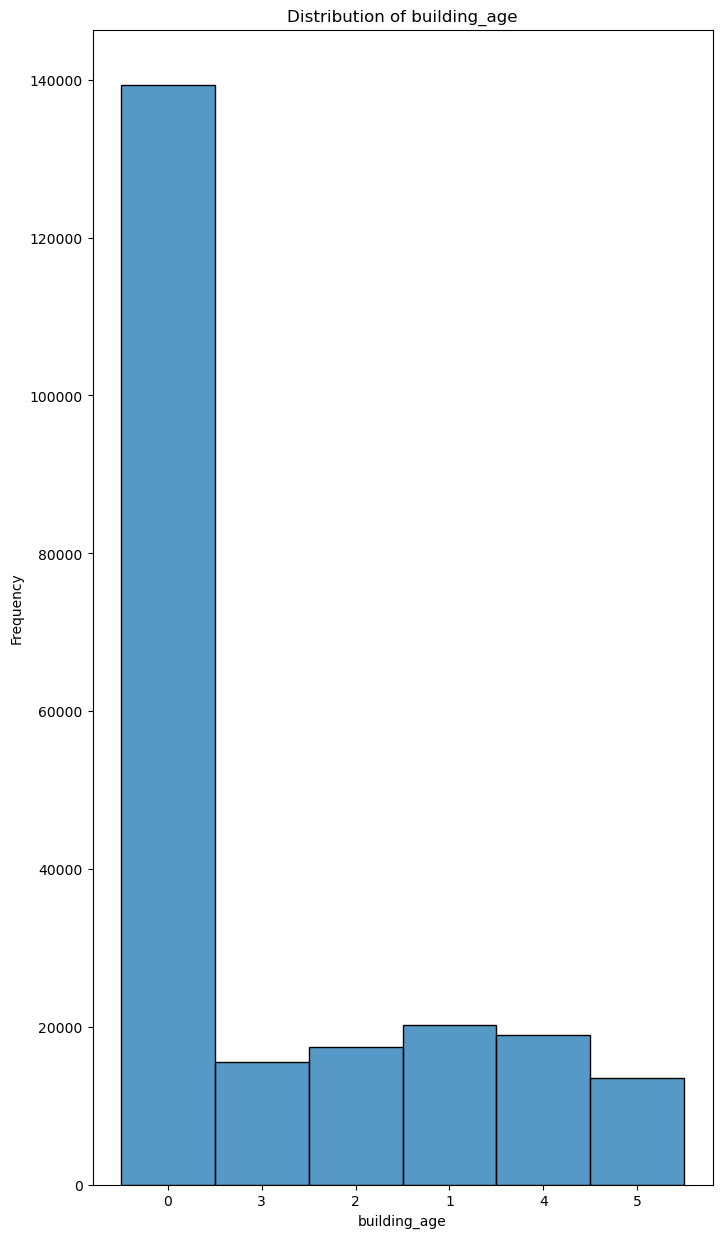

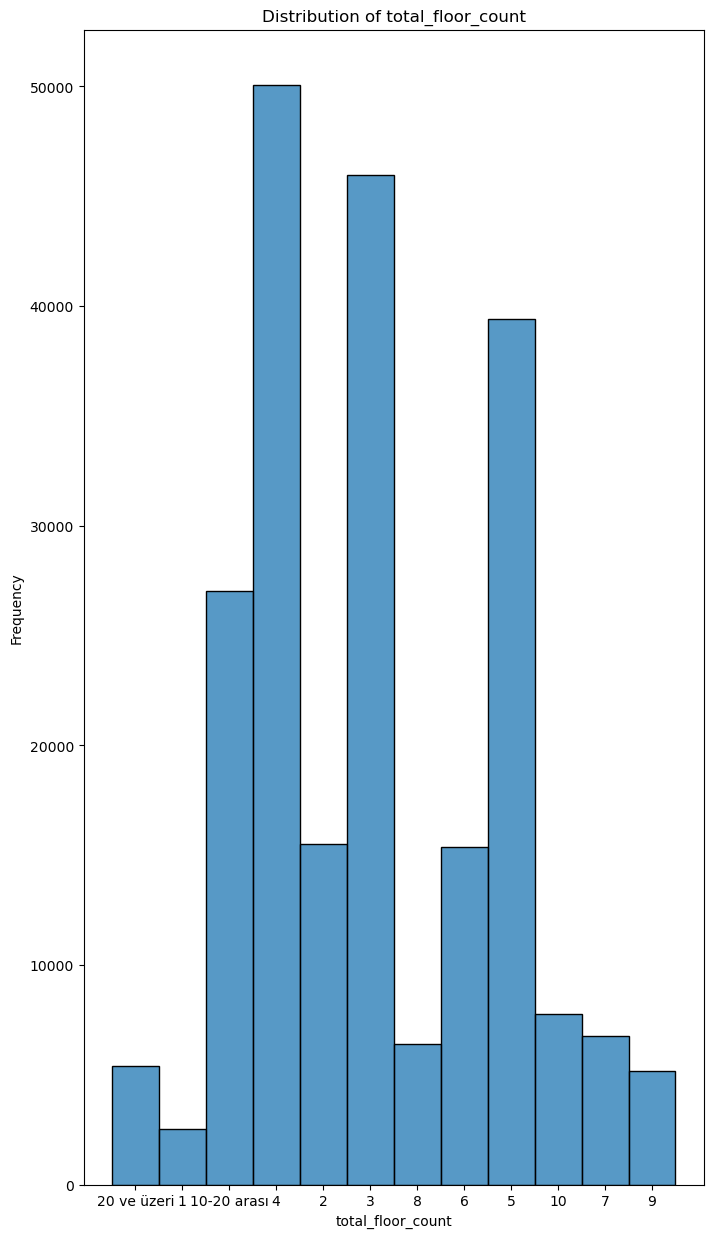

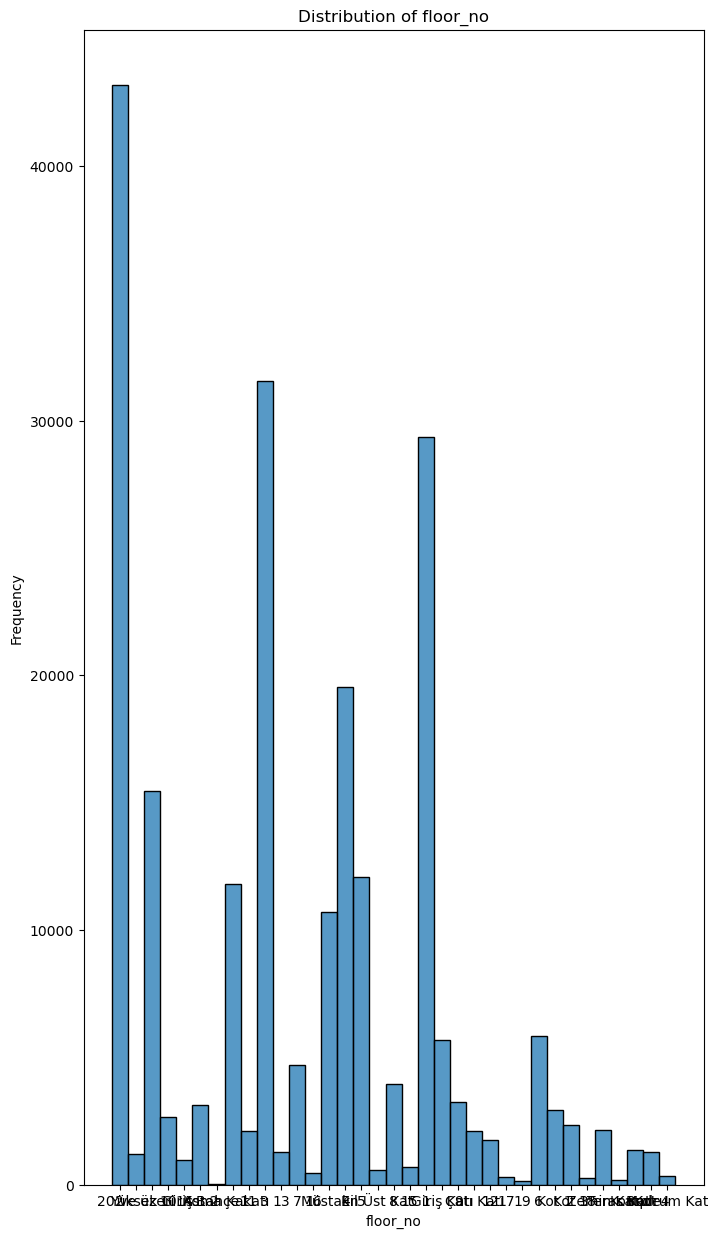

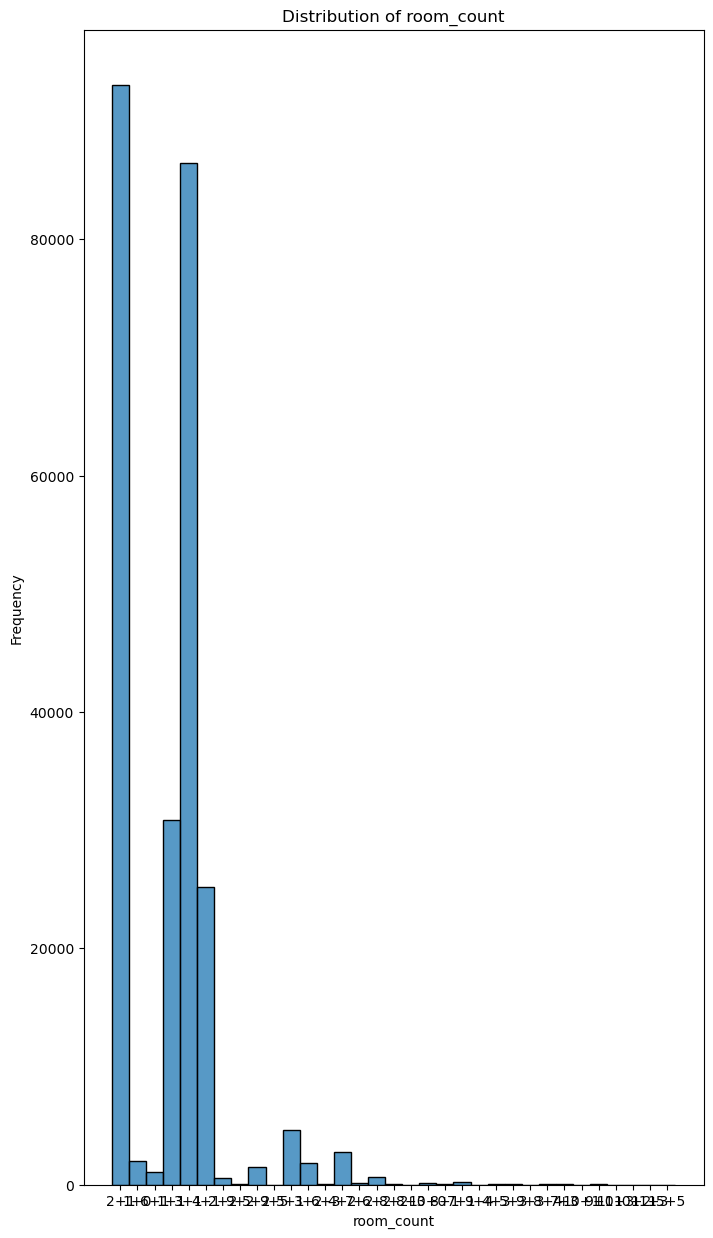


KeyboardInterrupt



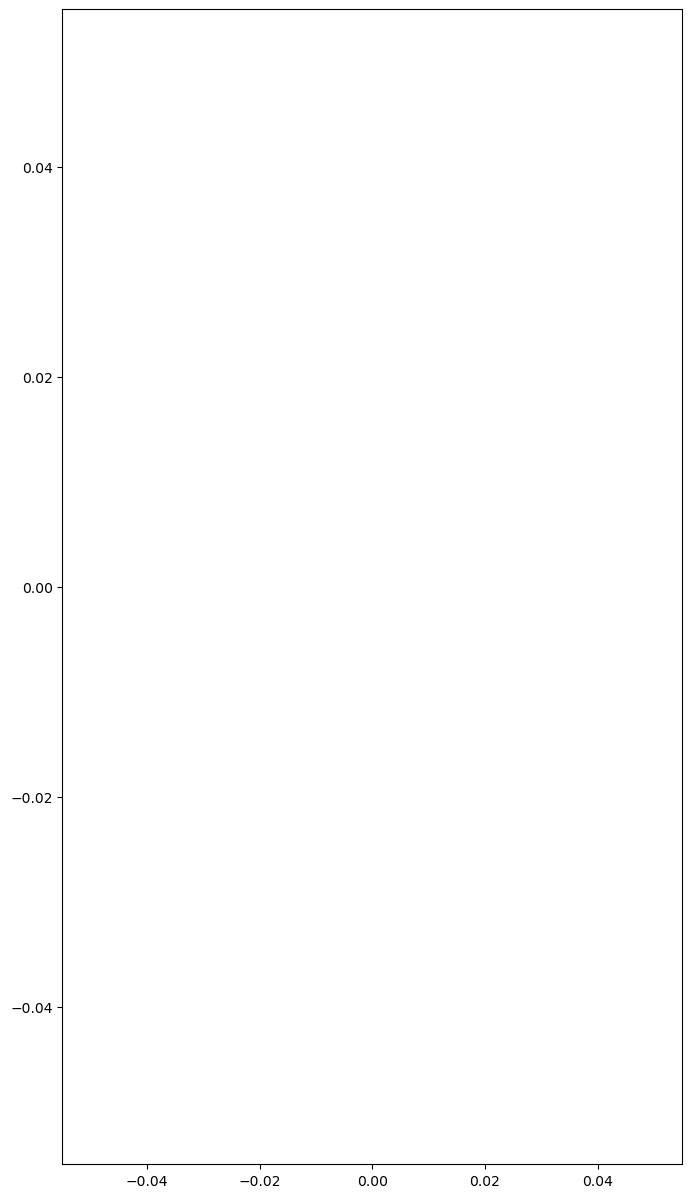

In [55]:
for column in data.columns:
    plt.figure(figsize=(8, 15))
    plt.tight_layout()
    
    sns.histplot(data[column])
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show();

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251647 entries, 0 to 403486
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 251647 non-null  int64  
 1   sub_type           251647 non-null  object 
 2   start_date         251647 non-null  object 
 3   end_date           165324 non-null  object 
 4   listing_type       251647 non-null  int64  
 5   tom                251647 non-null  int64  
 6   building_age       225146 non-null  object 
 7   total_floor_count  227330 non-null  object 
 8   floor_no           225273 non-null  object 
 9   room_count         251647 non-null  object 
 10  size               251647 non-null  float64
 11  price              251561 non-null  float64
 12  id_heating_type    227166 non-null  float64
 13  id_city            251647 non-null  int64  
 14  id_county          251642 non-null  float64
 15  id_district        251638 non-null  float64
 16  id_pric

In [114]:
data.head()

,id,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,price,id_heating_type,id_city,id_county,id_district,id_price_currency
0,1,Rezidans,12/10/18,1/9/19,2,30,0,20 ve üzeri,2,2+1,90.000000,3500.0,15.0,1,30.0,232.0,1.0
1,2,Daire,2/13/19,NaN,1,14,0,20 ve üzeri,20 ve üzeri,1+0,43.000000,490000.0,15.0,1,30.0,232.0,1.0
2,3,Daire,10/9/18,11/8/18,1,30,0,1,Yüksek Giriş,2+1,279.349094,155000.0,15.0,16,52.0,257.0,1.0
3,4,Rezidans,9/10/18,10/10/18,1,30,3,20 ve üzeri,20 ve üzeri,6+1,450.000000,32500000.0,15.0,1,91.0,598.0,1.0
4,5,Rezidans,12/10/18,1/9/19,1,30,0,20 ve üzeri,2,2+1,90.000000,1450000.0,15.0,1,30.0,232.0,1.0
